In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import shutil

In [2]:
def image_feature(direc):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for file in direc:
        img=image.load_img("dataset/image/"+file,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(file)
    return features,img_name

In [3]:
img_path=os.listdir("dataset/image")
img_features,img_name=image_feature(img_path)

1/1 [==============================] - 0s 57ms/step


c:\users\younu\appdata\local\programs\python\python39\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 61ms/step


In [4]:
k = 3
clusters = KMeans(k, random_state = 42)
clusters.fit(img_features)

KMeans(n_clusters=3, random_state=42)

In [5]:
clusters.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
image_cluster = pd.DataFrame(img_name,columns=['image'])
image_cluster["labels"] = clusters.labels_

In [7]:
image_cluster.head()

,image,labels
0,hyacinth_10.jpeg,2
1,hyacinth_11.jpeg,2
2,hyacinth_13.jpeg,2
3,hyacinth_14.jpeg,2
4,hyacinth_15.jpeg,2


In [8]:
# cols = image_cluster.columns[image_cluster['labels'] == 0]
# df_filtered = image_cluster[cols]
# df_filtered

In [9]:
cl1 = image_cluster[image_cluster['labels']==0]['image'].tolist()
len(cl1)

30

In [10]:
cl2 = image_cluster[image_cluster['labels']==1]['image'].tolist()
len(cl2)

34

In [11]:
cl3 = image_cluster[image_cluster['labels']==2]['image'].tolist()
len(cl3)

45

In [12]:
def plot_clusters(path, row, col, image_list, title="Clusters"):
    folder_path = path
    image_list = image_list
    rows = row
    cols = col

    fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
    fig.suptitle(title)

    for i, img_name in enumerate(image_list):
        row = i // cols
        col = i % cols

        img_path = os.path.join(folder_path, img_name)
        img = plt.imread(img_path)

        axs[row, col].imshow(img)
        axs[row, col].axis('off')
    plt.show()

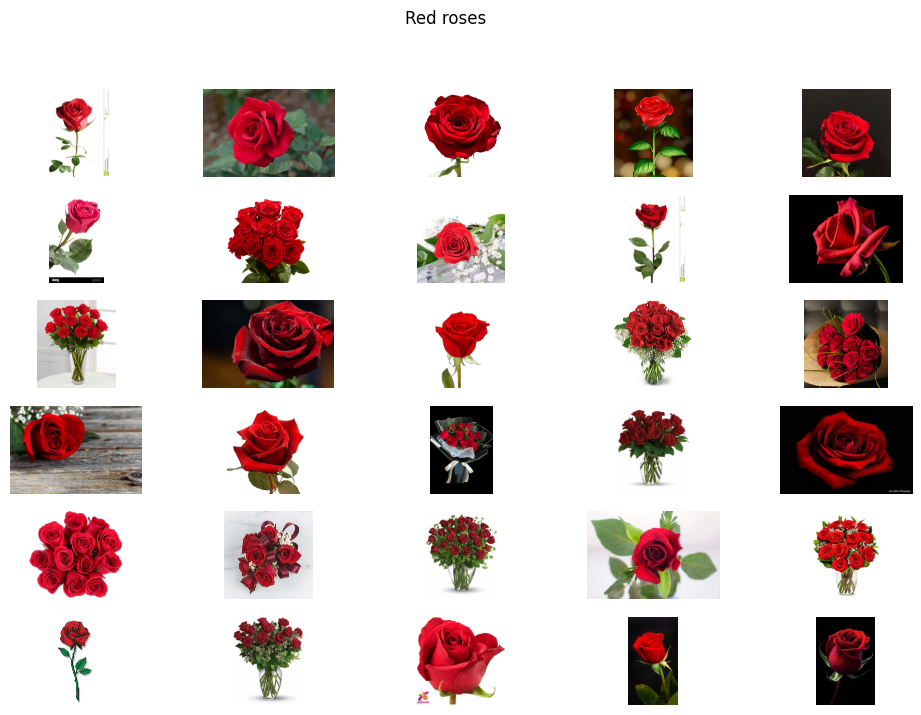

In [13]:
plot_clusters('dataset\image', 6,5, cl1, "Red roses")

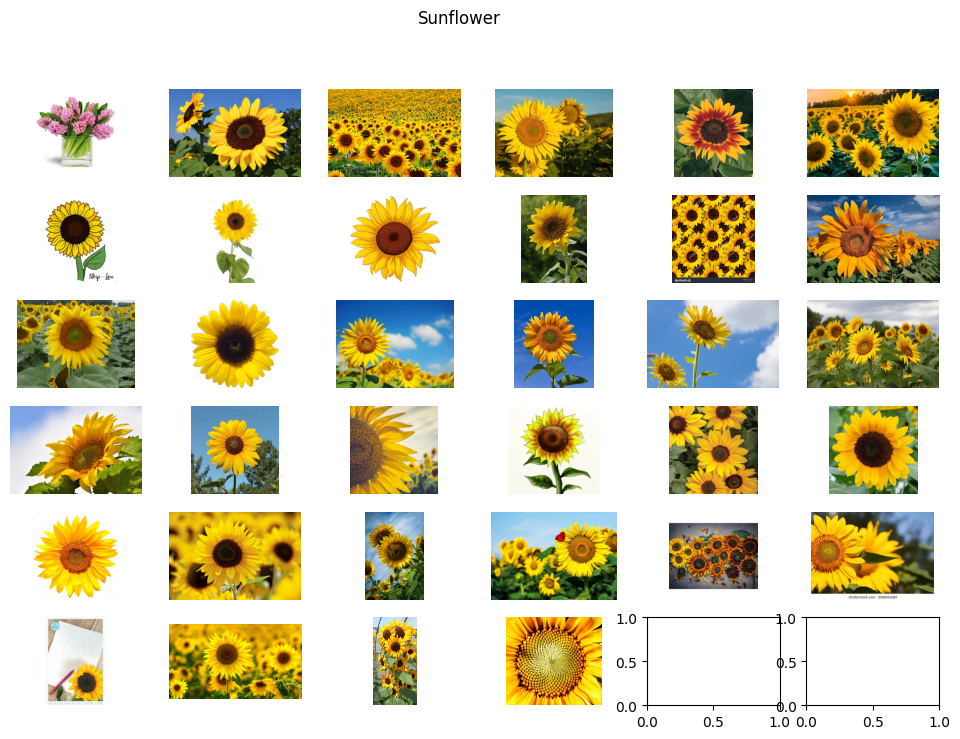

In [14]:
plot_clusters('dataset\image', 6,6, cl2, "Sunflower")

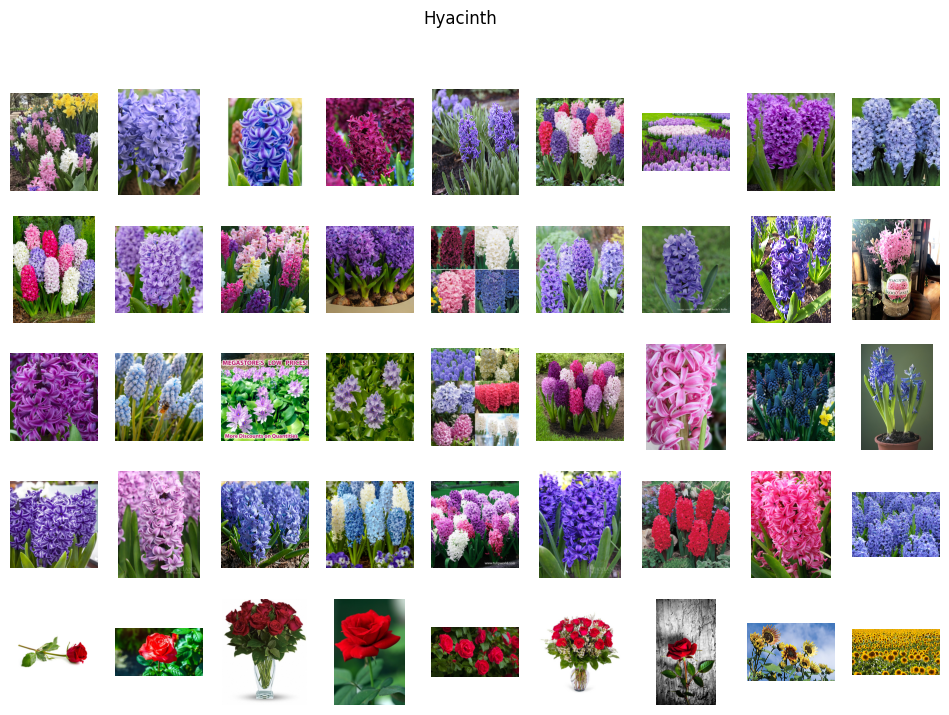

In [15]:
plot_clusters('dataset\image', 5,9, cl3, "Hyacinth")